In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('earthquake_catalog_1980_2023.csv')
df.head()

,Unnamed: 0,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,0,1980/01/01,00:05:01.21,eq,l,1.80,h,33.723,-118.854,6.0,C,12277543.0,12.0,164.0
1,1,1980/01/01,00:05:54.16,eq,l,2.40,h,33.727,-118.811,0.2,A,3301488.0,27.0,164.0
2,2,1980/01/01,01:53:06.21,eq,l,1.60,h,33.093,-116.077,6.0,C,3301492.0,22.0,164.0
3,3,1980/01/01,02:09:20.62,eq,r,3.10,h,36.522,-121.143,6.0,D,3325141.0,8.0,97.0
4,4,1980/01/01,02:29:13.71,eq,l,1.80,h,36.455,-117.934,6.4,D,3301493.0,7.0,164.0


# Perform EDA

array([[<AxesSubplot: title={'center': '#YYY/MM/DD'}>,
        <AxesSubplot: title={'center': 'MAG'}>,
        <AxesSubplot: title={'center': 'LAT'}>],
       [<AxesSubplot: title={'center': 'LON'}>,
        <AxesSubplot: title={'center': 'DEPTH'}>,
        <AxesSubplot: title={'center': 'EVID'}>],
       [<AxesSubplot: title={'center': 'NPH'}>,
        <AxesSubplot: title={'center': 'NGRM'}>, <AxesSubplot: >]],
      dtype=object)

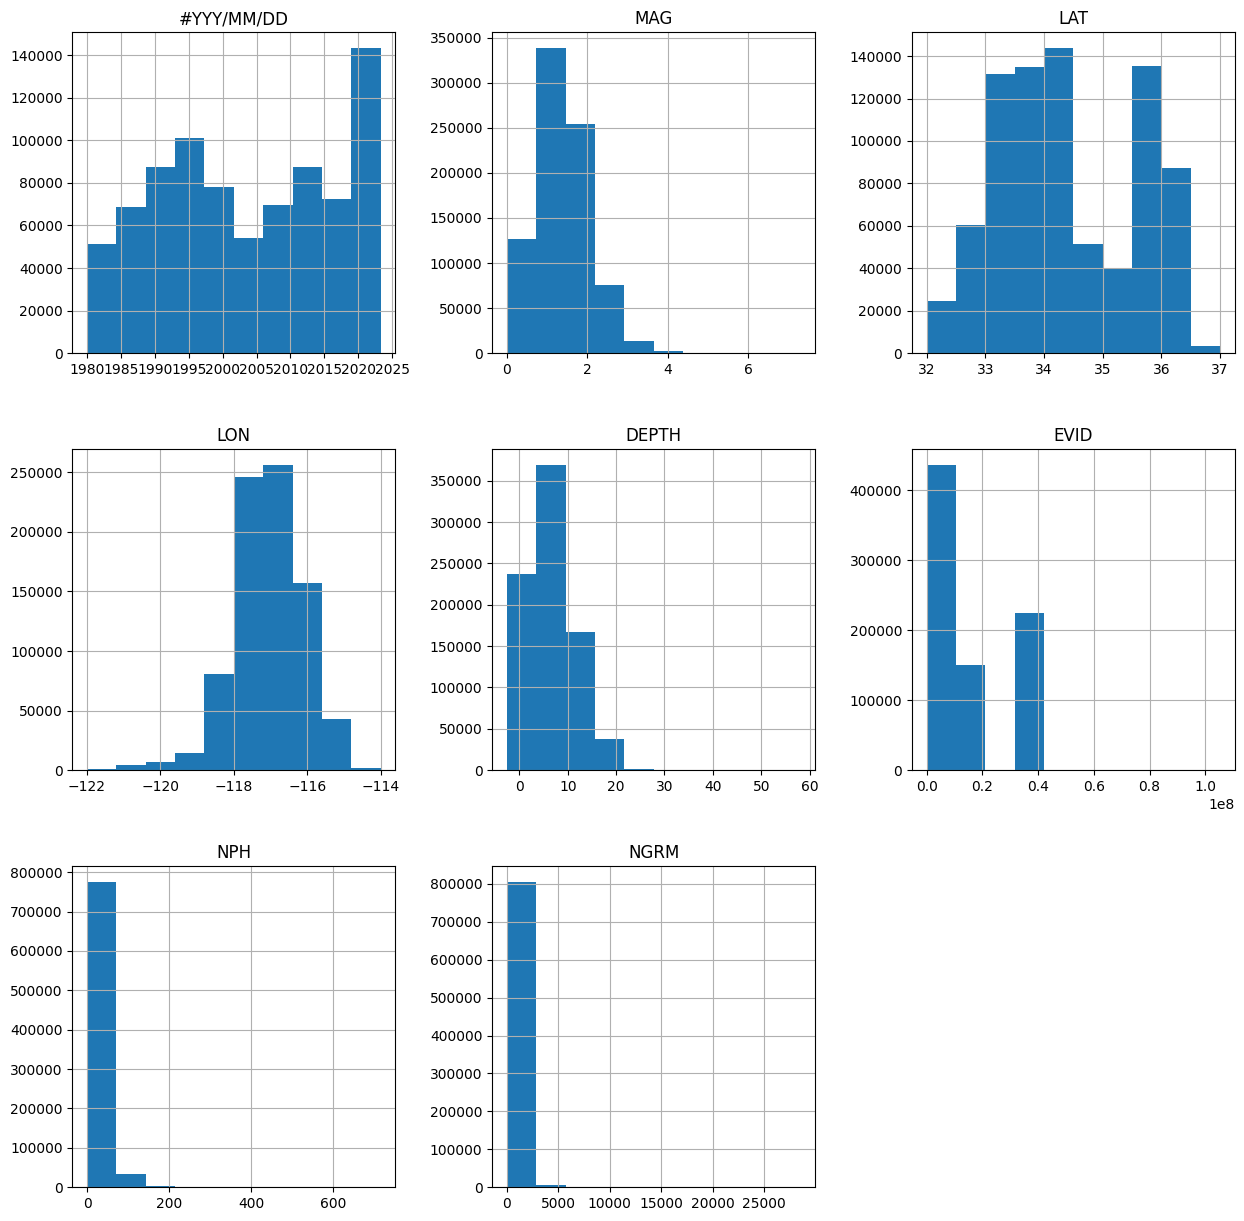

In [147]:
df.hist()

Check included event types
* eq = earthquake
* qb = quarry blast

In [148]:
df['ET'].describe()

count     812749
unique         2
top           eq
freq      771261
Name: ET, dtype: object

In [149]:
print(df['MAG'].describe())
print(df['MAG'].max(), df['MAG'].min())

count    812749.000000
mean          1.386123
std           0.657779
min           0.000000
25%           0.910000
50%           1.330000
75%           1.790000
max           7.300000
Name: MAG, dtype: float64
7.3 0.0


In [154]:
df2 = df[['#YYY/MM/DD', 'MAG']]
df2.head()

,#YYY/MM/DD,MAG
0,1980-01-01,1.8
1,1980-01-01,2.4
2,1980-01-01,1.6
3,1980-01-01,3.1
4,1980-01-01,1.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Earthquake Magnitudes')

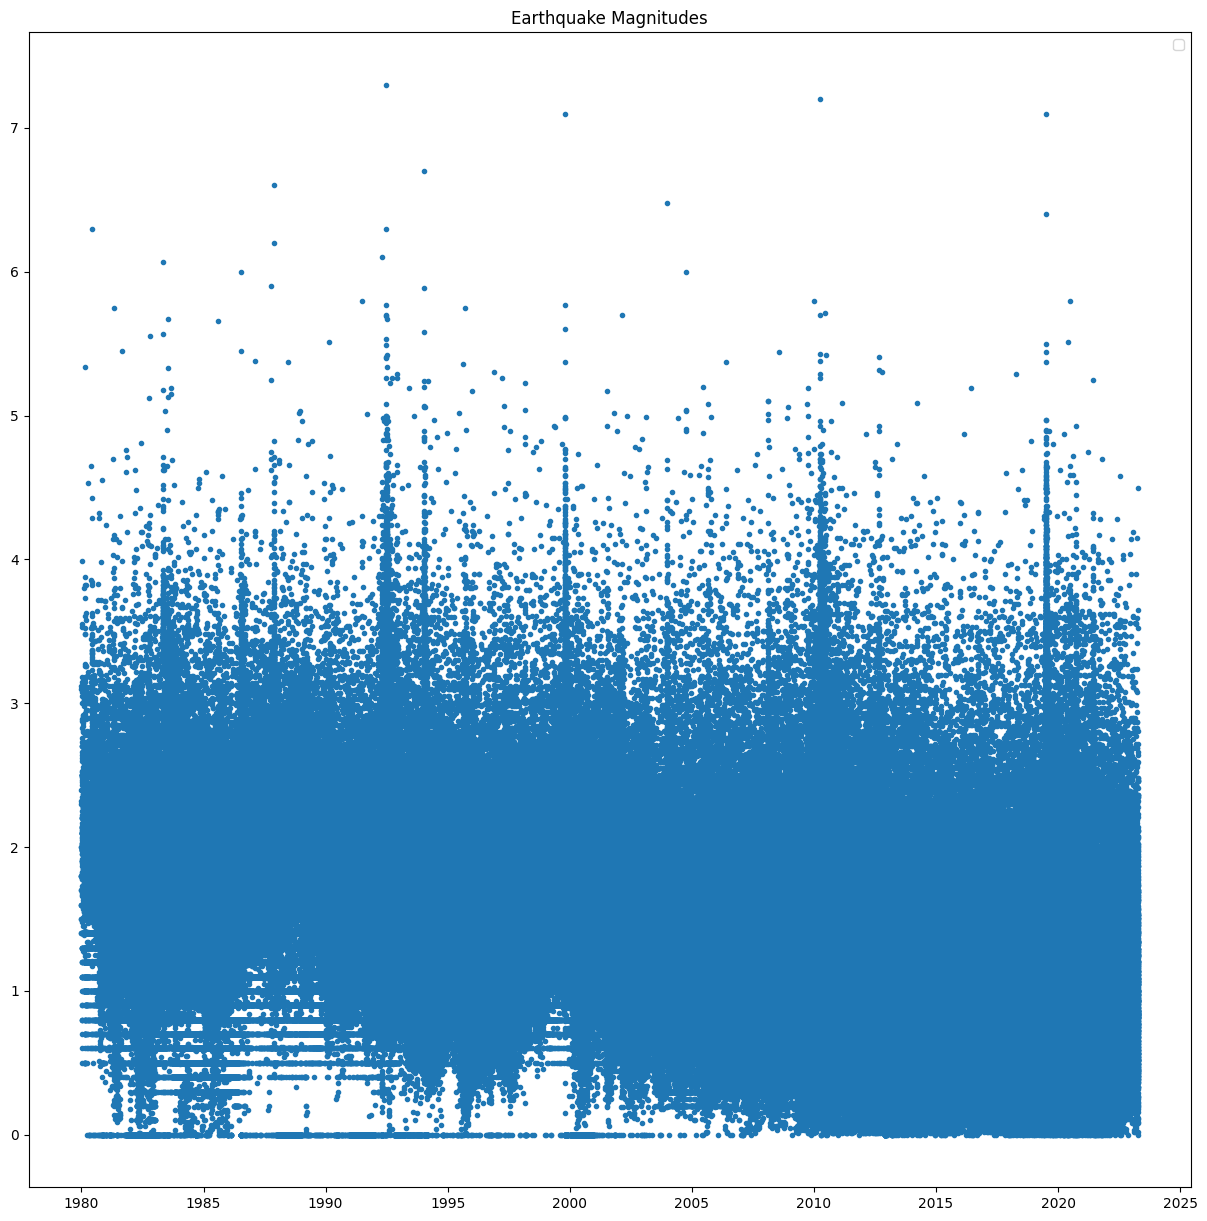

In [164]:
plt.plot(df2['#YYY/MM/DD'],df2['MAG'],'.')
plt.legend()
plt.title("Earthquake Magnitudes")

<AxesSubplot: >

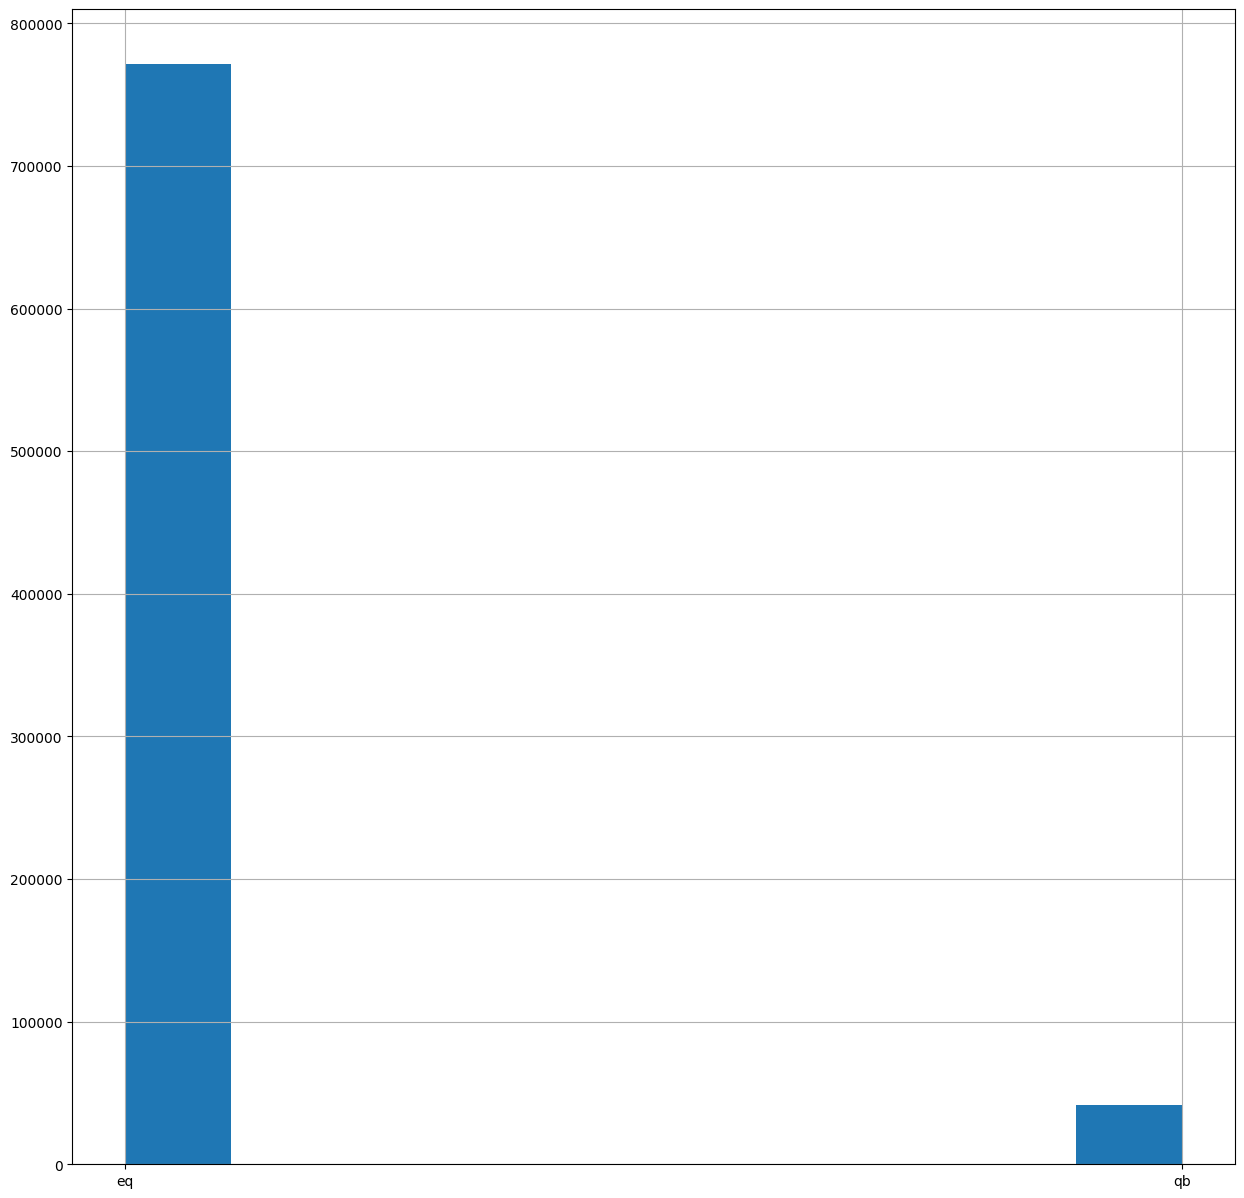

In [169]:
df['ET'].hist()

Check stationarity (seasonality) - expecting to see none

https://builtin.com/data-science/time-series-python

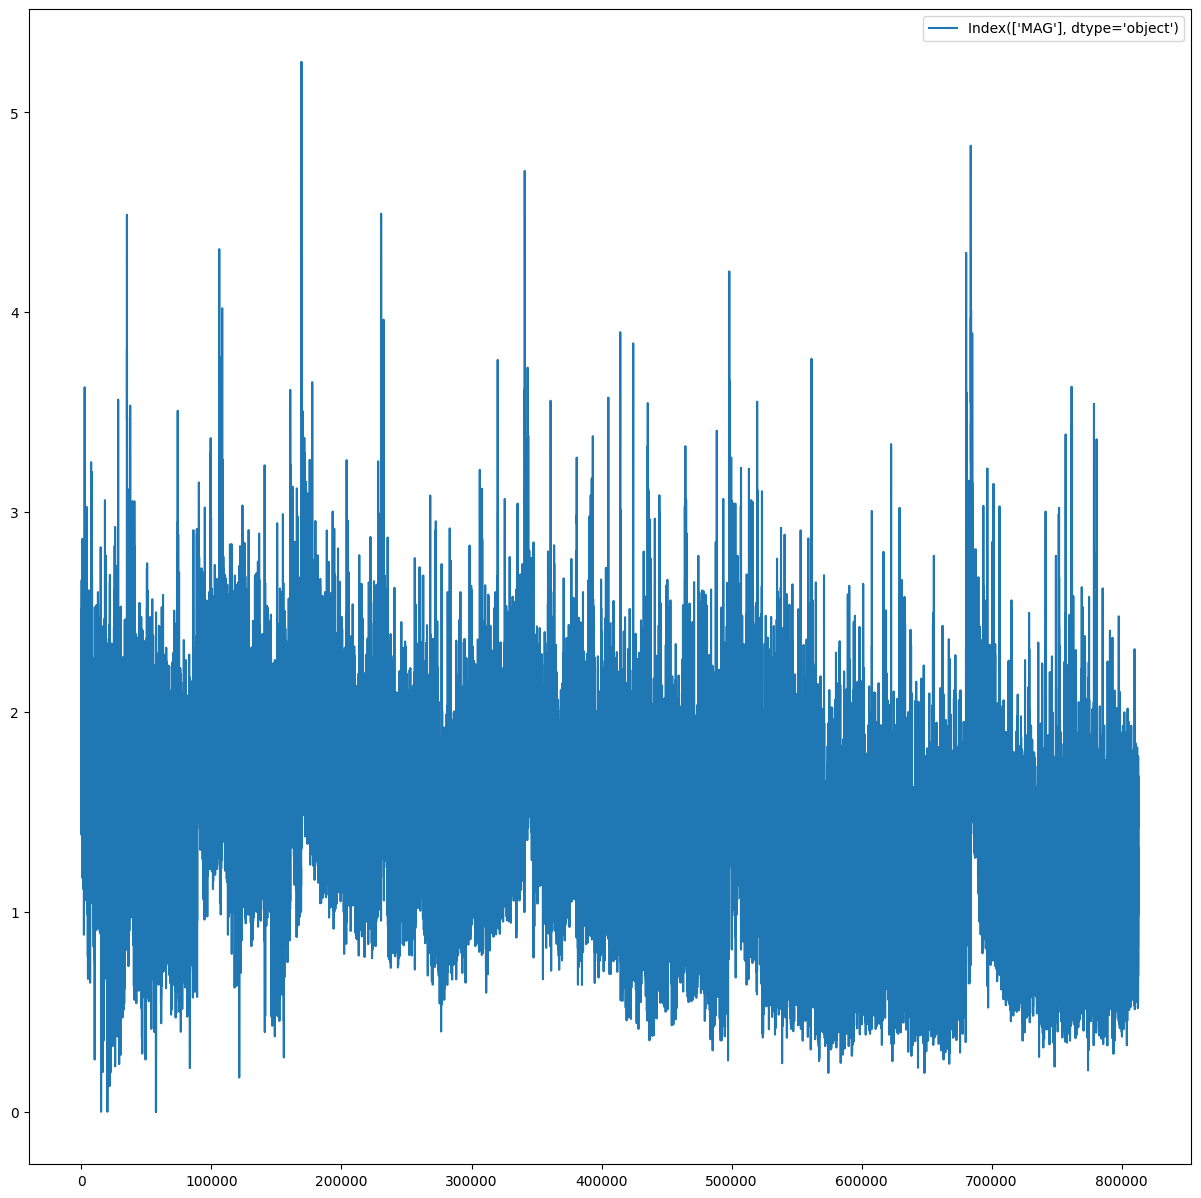

In [174]:
rolling_mean = df2.rolling(7).mean()
rolling_std = df2.rolling(7).std()
plt.plot(rolling_mean, label=rolling_mean.columns)
plt.legend()


In [11]:
sns.lineplot(df2)
print("Done")

NameError: name 'df2' is not defined

Correlation

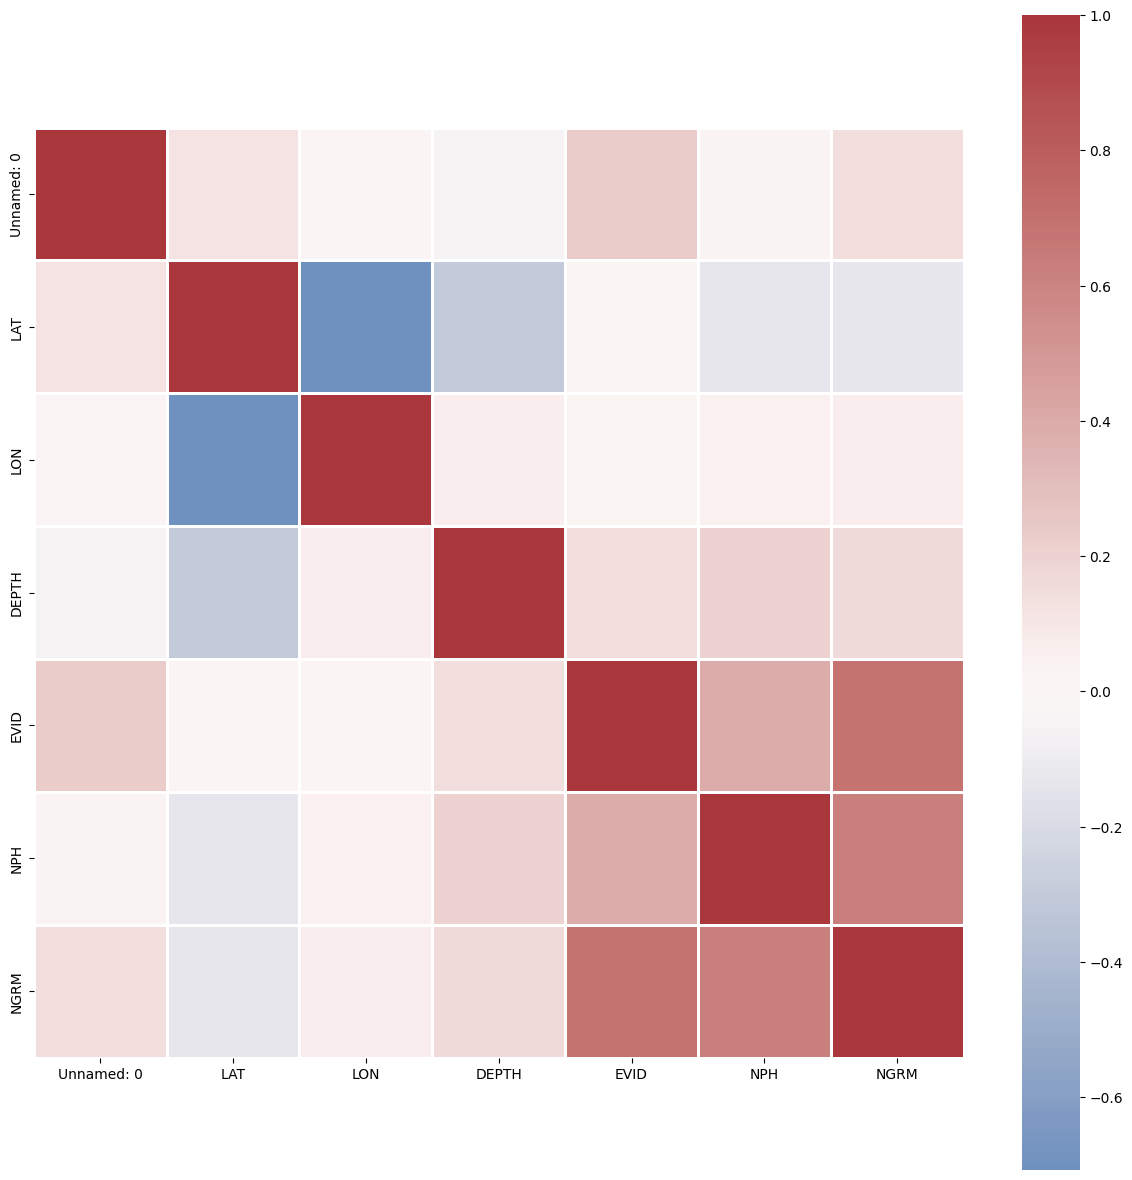

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams

correlations = df.corr()

#figure size in inches
rcParams['figure.figsize'] = 15,15 #letter-size, in inches

#use a diverging colormap
sn.heatmap(correlations, cmap="vlag", center=0, square=True, linewidths=1)

plt.show()
#plt.savefig('correlationMatrix3.png') #saves to disk
plt.close()